# **LeNet**
##### **Lenet-5 has 7 layers**
##### **They are :**
##### **1. 3 Convolution layers**
##### **2. 2 Average pooling layers**
##### **3. 2 Fully connected layers**

### **The layers in LeNet**
##### **1.** The first layer is the input layer which is 32x32
##### However, the dataset that we're going to use (MNIST) has images of size 28x28.
##### Therefore, the images will need to be padded to 32x32
##### **2.** The (grayscale) images are then normalized from (0, 255) to (0, 1)

In [104]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [105]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data ()

In [106]:
train_x = train_x / 255.0
test_x = test_x / 255.0
print (train_x.shape)
print (test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [107]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
print (train_x.shape)
print (test_x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [129]:
layer0 = keras.layers.Conv2D (filters = 6,
                              kernel_size = 5,
                              strides = 1,
                              activation = 'tanh',
                              input_shape = train_x [0].shape,
                              padding = 'same')
layer1 = keras.layers.AveragePooling2D ()

layer2 = keras.layers.Conv2D (filters = 16,
                              kernel_size = 5,
                              strides = 1,
                              activation = 'tanh',
                              padding = 'valid')
layer3 = keras.layers.AveragePooling2D ()

layer4 = keras.layers.Conv2D (filters = 120,
                              kernel_size = 5,
                              strides = 1,
                              activation='tanh')

layer5 = keras.layers.Flatten ()
layer6 = keras.layers.Dense (84, activation = 'tanh')
layer7 = keras.layers.Dense (10, activation = 'softmax')

layers = [layer0, layer1, layer2, layer3, layer4, layer5, layer6, layer7]

In [130]:
lenet_5_model = tf.keras.models.Sequential (layers)
lenet_5_model_decay = tf.keras.models.Sequential (layers)
lenet_5_model.summary ()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_19 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_9 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 84)              

#### Optimizers
`w = w - alpha * dW`
##### 1. Momentum Optimizer :
```
w = w - alpha * VdW
VdW = Beta_1 * VdW_prev + (1 - Beta_1) * dW
```
##### 2. RMSProp Optimizer :
```
w = w - alpha * dW / (sqrt (SdW + epsilon))
SdW = Beta_2 * SdW_prev + (1 - Beta_2) * dW * dW
```
##### 3. Adam Optimizer :
```
Combine Both Momentum and RMSProp optimizers
w = w - alpha * VdW / (sqrt (SdW + epsilon))
```

In [122]:
learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam (learning_rate = learning_rate,
                                      beta_1 = 0.9,
                                      beta_2 = 0.999,
                                      epsilon = 1e-08)

In [123]:
lenet_5_model.compile (optimizer = optimizer,
                       loss = keras.losses.sparse_categorical_crossentropy,
                       metrics = ['accuracy'])

In [124]:
fitModel = lenet_5_model.fit (train_x, train_y, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2196 - accuracy: 0.9348
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0872 - accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0616 - accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0475 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0382 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0309 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 21s 11m

#### **Training the model with a decaying learning rate**
---

In [131]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=550,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.Adam (learning_rate = lr_schedule,
                                      beta_1 = 0.9,
                                      beta_2 = 0.999,
                                      epsilon = 1e-08)

In [132]:
lenet_5_model_decay.compile (optimizer = optimizer,
                       loss = keras.losses.sparse_categorical_crossentropy,
                       metrics = ['accuracy'])

In [133]:
fitModel = lenet_5_model_decay.fit (train_x, train_y, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2278 - accuracy: 0.9302
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0853 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0583 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0425 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0307 - accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0232 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0170 - accuracy: 0.9954
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0129 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0098 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 20s 11m

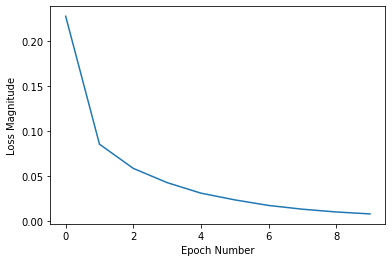

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel ('Epoch Number')
plt.ylabel ("Loss Magnitude")

plt.plot (fitModel.history ['loss'])

In [139]:
print ("Evaluate on test data")
results = lenet_5_model_decay.evaluate (test_x, test_y)
print ("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 1s 4ms/step - loss: 0.0440 - accuracy: 0.9874
test loss, test acc: [0.04397938400506973, 0.9873999953269958]
